In [ ]:
import pandas as pd
df_articles = pd.read_csv('shared_articles.csv')
df_users = pd.read_csv('users_interactions.csv')

In [4]:
df_articles.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [5]:
df_users.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [6]:
# Assuming you have two DataFrames: df1 and df2
merged_df = df_articles.merge(df_users, on='contentId', how='inner')  # Use 'inner', 'left', 'right', or 'outer' as needed

# Display the merged DataFrame
merged_df.head()

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192561,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
1,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192667,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
2,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459164960,VIEW,-1578287561410088674,2811329017818501696,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,SP,BR
3,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR
4,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [11]:
# Map eventType to numeric ratings
event_type_to_rating = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}

# Create the 'ratings' column
merged_df['rating'] = merged_df['eventType_y'].map(event_type_to_rating)

# Display the updated DataFrame
merged_df.head()

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,...,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry,ratings,rating
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,en,1459192561,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR,1,1
1,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,en,1459192667,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR,1,1
2,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,en,1459164960,VIEW,-1578287561410088674,2811329017818501696,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,SP,BR,1,1
3,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR,1,1
4,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR,1,1


In [12]:
# Create a DataFrame with only contentId, personId, and ratings
df_ratings = merged_df[['personId', 'contentId', 'rating']]

# Display the new DataFrame
df_ratings.head()

,personId,contentId,rating
0,4340306774493623681,-6451309518266745024,1
1,4340306774493623681,-6451309518266745024,1
2,-1578287561410088674,-6451309518266745024,1
3,2873028073541627603,-4110354420726924665,1
4,8414731042150985013,-7292285110016212249,1


<Axes: xlabel='rating', ylabel='Count'>

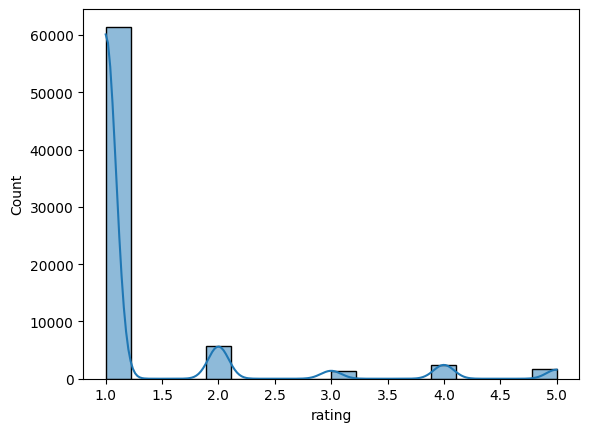

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_ratings, x='rating', kde=True)

In [14]:
print(f"Number of ratings: {len(df_ratings)}")
print(f"Number of Articles: {len(df_articles.contentId.unique())}")
print(f"Number of Persons: {len(df_ratings.personId.unique())}")

print(f"Sparsity: {1 - (len(df_ratings) / (df_ratings.contentId.nunique() * df_ratings.personId.nunique()))}")

Number of ratings: 72680
Number of Articles: 3057
Number of Persons: 1895
Sparsity: 0.9871598386323144


In [15]:
print('Min:\t\t', df_ratings['contentId'].value_counts().min())
print('Quartile 1:\t', df_ratings['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['contentId'].value_counts().max())

Min:		 1
Quartile 1:	 6.0
Median:		 14.0
Quartile 3:	 30.0
Max:		 433


In [16]:
value_counts = df_ratings.contentId.value_counts()
keep_list = value_counts[value_counts >= 30]
df_ratings_reduced = df_ratings.loc[df_ratings.contentId.isin(keep_list.index)]

In [18]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_ratings_reduced['personId'].nunique()   # Number of users for the matrix
I = df_ratings_reduced['contentId'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_ratings_reduced['personId']), list(range(U))))
item_mapper = dict(zip(np.unique(df_ratings_reduced['contentId']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_ratings_reduced['personId'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_ratings_reduced['contentId'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_ratings_reduced['personId']]
item_index = [item_mapper[i] for i in df_ratings_reduced['contentId']]

X = csr_matrix((df_ratings_reduced['rating'], (item_index, user_index)), shape=(I, U))
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 25036 stored elements and shape (768, 1804)>
  Coords	Values
  (0, 17)	1
  (0, 20)	1
  (0, 29)	1
  (0, 33)	1
  (0, 66)	1
  (0, 98)	1
  (0, 112)	1
  (0, 122)	1
  (0, 191)	1
  (0, 271)	1
  (0, 384)	1
  (0, 497)	1
  (0, 537)	1
  (0, 601)	1
  (0, 621)	9
  (0, 641)	1
  (0, 713)	2
  (0, 751)	3
  (0, 762)	1
  (0, 773)	1
  (0, 791)	3
  (0, 920)	1
  (0, 948)	3
  (0, 952)	1
  (0, 968)	1
  :	:
  (767, 227)	1
  (767, 290)	1
  (767, 293)	4
  (767, 384)	3
  (767, 751)	5
  (767, 762)	1
  (767, 863)	1
  (767, 928)	1
  (767, 1026)	1
  (767, 1082)	1
  (767, 1161)	1
  (767, 1186)	1
  (767, 1201)	5
  (767, 1253)	1
  (767, 1268)	1
  (767, 1277)	1
  (767, 1315)	3
  (767, 1336)	3
  (767, 1337)	1
  (767, 1452)	1
  (767, 1518)	1
  (767, 1646)	6
  (767, 1748)	3
  (767, 1784)	1
  (767, 1797)	2


In [19]:
def create_matrix(df, user, item, rating):
        import numpy as np
        from scipy.sparse import csr_matrix
        
        U = df[user].nunique()  # Number of users for the matrix
        I = df[item].nunique()  # Number of items for the matrix
        
        # Map user and movie IDs to matrix indices
        user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
        item_mapper = dict(zip(np.unique(df[item]), list(range(I))))
       
        # Map matrix indices back to IDs
        user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
        item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))
        
        # Create a list of index values for the csr_matrix for users and movies
        user_index = [user_mapper[i] for i in df[user]]
        item_index = [item_mapper[i] for i in df[item]]
        
        # Build the final matrix which will look like: (movieId, userId) rating
        X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))
        
        return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [21]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_ratings_reduced, 'personId', 'contentId', 'rating')

In [22]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

In [41]:
# Use any movie id here to get recommendations
df_articles.set_index('contentId', inplace=True)
contentId = -4132331404553626868
similar_ids, rec_distances = recommend(contentId, X, item_mapper, item_inv_mapper, k=10, messages=False)

print(f"If you like {df_articles.loc[contentId, 'title']}, you may also enjoy:\n")
df_articles.loc[similar_ids, 'title']

If you like Gartner Reprint, you may also enjoy:



contentId
-3959242148361340089                                      Gartner Reprint
-7539387928750597096    Smart Contact Lens-Eyeglass Combo Could Monito...
-3780822597455574960    Top Programming Languages Trends: The Rise of ...
-4625438649010928449    Top Asset Tracking Software: The 52 Best Tools...
 4876769046116846438       Shopping em BH terá fazenda urbana de 2.700 m²
-3191013159715472435    Robô acha de almoço de 12 kg a cervejas pagas ...
-1452340812018195881    Globo G1 lança Bot para o Telegram que te ajud...
 3306277069425849869    Google segue Microsoft e lança ferramenta anal...
-742603651309629354     JetBrains DataGrip: Your Swiss Army Knife for ...
 7506614456429888492    Assessing Salesforce's platform and ecosystem ...
Name: title, dtype: object

In [43]:
user_id = 4340306774493623681
k = 20

df_user_ratings = df_ratings_reduced.loc[df_ratings_reduced['personId'] == user_id].sort_values(by=['rating'], ascending=False)
max_rating = df_user_ratings.rating.max()
df_user_ratings = df_user_ratings.loc[df_user_ratings.rating==max_rating]
df_user_ratings

,personId,contentId,rating
32050,4340306774493623681,-6697357763177451167,2
34268,4340306774493623681,-2539915991213675511,2


In [44]:
df_rec_list = pd.DataFrame(columns=['Distance'], index=['Recommendation'])

for i in df_user_ratings.contentId:
    rec_ids, rec_distances = recommend(i, X, item_mapper, item_inv_mapper, k=10, messages=False)
    for j, movie in enumerate(rec_ids):
        df_rec_list.loc[movie] = rec_distances[j]

df_rec_list.sort_values(by=['Distance'])

C:\Users\BenIn\AppData\Local\Temp\ipykernel_7128\4059178466.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_rec_list.loc[movie] = rec_distances[j]


,Distance
-8813724423497152538,0.394998
-6820241302436968068,0.472760
5719793245136119929,0.473469
-8370744479086515302,0.479463
2916072977192006313,0.499789
-4700714777342103147,0.532682
-7613994611628693820,0.560648
-3285397592982852407,0.573916
-1663441888197894674,0.604472
-6697357763177451167,0.604878


# Deployment

In [45]:
k = 5

df_recommendations = pd.DataFrame(columns=['If you liked'], index=item_mapper)
for i in range(1, k + 1):
    df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
    rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
    df_recommendations.at[row[0], 'If you liked'] = df_articles.at[row[0], 'title']

    for i, r in enumerate(rec_ids):
        df_recommendations.at[row[0], f"Recommendation {i + 1}"] = df_articles.at[r, 'title']

df_recommendations

,If you liked,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
-9192549002213406534,Chrome OS now has Material Design for the desktop,Elastic Stack 5.0.0 Released,"Microsoft lança Teams, nova plataforma de chat...","Hello, a nova rede social do Orkut, está liber...",A Googler analyzed a billion files to settle t...,You SHOULD Learn Vanilla JavaScript Before JS ...
-9189659052158407108,Eddy Cue and Craig Federighi Open Up About Lea...,Clean Coder Blog,Pull request first - Practical Blend,Beyond Progressive Web Apps Part 1,"""Eat, sleep, code, repeat"" is such bullshit - ...",Most Interesting APIs in 2016: Cognitive Compu...
-9176143510534135851,Livraria dá adeus a estoque e imprime livros n...,Top 10 Insurtech Trends for 2017 - Insurance T...,Governo brasileiro cria manual para contrataçã...,The barbell effect of machine learning.,"No, Apple isn't the next BlackBerry - it's the...",Facebook Workplace officially launches on the ...
-9160910454530522563,"Apple's new file manager, APFS, is awesome",A New Number Format for Computers Could Nuke A...,CSS Containment in Chrome 52 | Web Updates - G...,The End Of Apple Man,19 Tips For Everyday Git Use,Facebook's WhatsApp does something very differ...
-9128741757954228992,Confirmed: Walmart buys Jet.com for $3B in cash,Nintendo has doubled in value since Pokémon Go...,How enterprise architects can help ensure succ...,The Internet of Things is looking for its Visi...,Power to the People: How One Unknown Group of ...,Two Different Sales Motions . . . .
...,...,...,...,...,...,...
9079880752026843473,Design Better Forms - uxdesign.cc - User Exper...,Front in BH 2016,Designer Creates 13 Perfect Circles to Draw Al...,Spotify UI built with HTML / CSS - Freebiesbug,71 erros de português que precisam sumir dos s...,The Best Linux Distros of 2016
9136323715291453594,How to Improve 8 Major Problem Areas for Japan...,Hacked Website Report - 2016/Q3,The Developer's Midlife Crisis: What's Next?,Drupal and ambitious digital experiences,What Color is Your Function?,Código Limpo - Está na hora de deixar o GDD (G...
9175693555063886126,15 minutos sobre Docker,Using Microservices Architecture as API Enable...,Arquitetura de Microserviços habilitando APIs ...,Contêiner do Windows no Windows 10,Most Interesting APIs in 2016: Cognitive Compu...,Custo do Erro - Cinco motivos para investir em...
9215261273565326920,"Meet Mycroft, the open source AI who wants to ...",Joel on Software,AWS vs Packet.net Why we left AWS Benchmarking...,Ordering coffee in Italy: the 10 commandments,WWDC 2016 preview: How to watch &amp; what to ...,Alecrim/AlecrimCoreData


In [46]:
def fit_cluster(X, k, metric='cosine'):
    from sklearn.neighbors import NearestNeighbors
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    return knn
    
  # These functions for deployment are the same ones we created and use earlier: lg3sz
def dump_pickle(model, file_name):
    import pickle
    pickle.dump(model, open(file_name, "wb"))
    
def load_pickle(file_name):
    import pickle
    model = pickle.load(open(file_name, "rb"))
    return model

In [47]:
# Fit the clustering model
k = 10  # Number of neighbors
metric = 'cosine'  # Similarity metric
knn_model = fit_cluster(X, k, metric)

In [48]:
# Save the trained model
dump_pickle(knn_model, 'collaborative_model.sav')